In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import scipy.io
opts = {"with_labels": True, "node_color":'grey'}

In [2]:
#Matriz de acoplamiento

def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 
   

[[-9.  1.  1. ...  0.  1.  1.]
 [ 1. -8.  1. ...  0.  0.  1.]
 [ 1.  1. -7. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -7.  1.  1.]
 [ 1.  0.  0. ...  1. -7.  1.]
 [ 1.  1.  0. ...  1.  1. -6.]]
El coeficiente de agrupamiento es: 0.21403174603174602
El promedio del camino mas corto es: 2.110204081632653


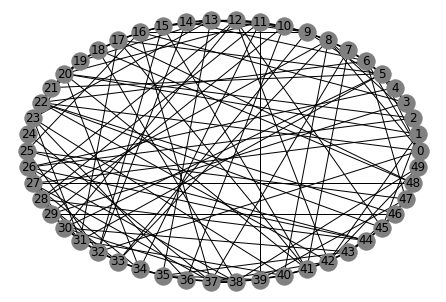

Los valores propios son:
[4.6028634965004886e-15, -2.6808938632558132, -2.8628649474547756, -2.9729991641961098, -3.45275475933778, -3.7107216878634532, -4.065718438190282, -4.337576844102485, -4.532783058753545, -4.567822877659094, -4.804190884893691, -4.99603031636505, -5.231732266838199, -5.590046557435775, -5.913883091755269, -6.038787934648795, -6.362893531725108, -6.4547628541894975, -6.53843865861246, -6.781290445528781, -6.886008171284237, -7.156034234376406, -7.3838088239283595, -7.55405430669078, -7.627772058930585, -7.893702256098175, -7.931666135627283, -8.291524050906293, -8.332727891626682, -8.467866823615498, -8.551155944619271, -8.885383012994824, -9.299331078230473, -9.463415533258447, -9.616944967956982, -9.82643231345121, -10.069432175345652, -10.19087770952558, -10.377134719600726, -10.538185044873991, -10.632506610412735, -10.999523471674115, -11.066079782511043, -11.442426455305252, -11.471874714880581, -11.72172146935832, -11.855282633319232, -12.240653330336581,

In [7]:
n, k = 50, 2
p = 0.9
G = nx.newman_watts_strogatz_graph(n,2*k,p)
clustering = nx.algorithms.average_clustering(G)
shorestPath = nx.average_shortest_path_length(G)
ma = matriz_acoplaminento(G)
#ma = -nx.laplacian_matrix(G).toarray()
scipy.io.savemat('c:/Users/Administrador/Documents/1MyStuffs/Master_FIME/TESIS/codigos/osciladores-Matlab/MatAcop.mat', mdict={'arr': ma})
print(ma)
print("El coeficiente de agrupamiento es:",clustering)
print("El promedio del camino mas corto es:",shorestPath)

nx.draw_circular(G,**opts)
plt.show()


#Calculo de los valores propios de la matriz de acoplamiento
vp = np.linalg.eigvals(ma)
vp = sorted(vp,reverse=True)
print("Los valores propios son:")
print(vp)
print("El valor propio Lamda2 es:")
print(vp[1])

print("El valor propio LamdaN es:")
print(vp[n-1])

#Calculo del metodo eingratio para sincronizabilidad
eingratio = vp[n-1]/vp[1]
print("El valor del eingratio de la red es:")
print(eingratio)